# Buatlah intrumen kuesioner, dan lakukan uji Validitas dan Reliabilitas, dilanjutkan analisis faktor

### Mengaktifkan library yang digunakan dan Membuka dataframe yang berisi kuesioner

In [1]:
import pandas as pd
data = pd.read_excel('data_answer.xlsx')
data1 = data.drop(columns = (['Nama Lengkap', 'NRP']))
data1

,Timestamp,Program Studi,Kemudahan Aksesbilitas Kampus PENS [Seberapa strategis lokasi PENS?],Kemudahan Aksesbilitas Kampus PENS [Seberapa mudah aksesibilitas transportasi menuju PENS?],Kemudahan Aksesbilitas Kampus PENS [Seberapa memadai fasilitas parkir di PENS?],Kemudahan Aksesbilitas Kampus PENS [Sejauh mana fasilitas penyandang disabilitas?],Kemudahan Aksesbilitas Kampus PENS [Bagaimana kualitas WIFI di area kampus PENS],Fasilitas Sarana dan Prasana Kampus PENS [Laboratorium],Fasilitas Sarana dan Prasana Kampus PENS [Perpustakaan],Fasilitas Sarana dan Prasana Kampus PENS [Masjid],...,Tenaga Pendidik Kampus PENS [Kemampuan dosen dalam menjawab pertanyaan],Tenaga Pendidik Kampus PENS [Ketepatan waktu kuliah],"Tenaga Pendidik Kampus PENS [Penguasaan dosen terhadap materi, wawasan, dan implementasi mata kuliah yang diampu]",Minat dan Bakat Kampus PENS [Organisasi mahasiswa (Ormawa)],Minat dan Bakat Kampus PENS [Unit Kreatifitas Mahasiswa (UKM)],Minat dan Bakat Kampus PENS [Komunitas],Minat dan Bakat Kampus PENS [Prestasi Akademik/non-Akademik],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan Bahan ajar (handout/file ppt)],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan Buku referensi (textbook) tersedia dengan baik],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan sarana prasarana dan kualitasnya yang mendukung mata kuliah]
0,2023-10-24 09:43:04.426,D4 Sains Data Terapan,Baik,Baik,Kurang,Kurang,Kurang,Baik,Kurang,Kurang,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Kurang,Baik
1,2023-10-24 09:43:09.541,D4 Sains Data Terapan,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
2,2023-10-24 09:43:34.792,D4 Sains Data Terapan,Baik,Baik,Kurang,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Baik,...,Baik,Baik,Baik,Kurang,Kurang,Baik,Baik,Kurang,Kurang,Kurang
3,2023-10-24 09:43:36.658,D4 Sains Data Terapan,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik
4,2023-10-24 09:43:45.975,D4 Sains Data Terapan,Sangat Baik,Sangat Baik,Kurang,Kurang,Kurang,Sangat Baik,Sangat Baik,Baik,...,Sangat Baik,Baik,Sangat Baik,Kurang,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2023-10-25 19:14:01.400,D4 Teknik Informatika,Sangat Baik,Baik,Baik,Baik,Sangat Kurang,Sangat Baik,Sangat Baik,Kurang,...,Baik,Kurang,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
119,2023-10-25 19:18:07.145,D3 Teknik Informatika,Baik,Baik,Kurang,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Sangat Baik,Baik,Sangat Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
120,2023-10-25 19:49:06.825,D4 Teknik Informatika,Baik,Baik,Baik,Baik,Sangat Kurang,Baik,Sangat Baik,Kurang,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
121,2023-10-25 22:00:23.219,D3 Teknik Informatika,Baik,Baik,Kurang,Kurang,Kurang,Baik,Baik,Baik,...,Baik,Baik,Sangat Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Baik,Kurang


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 25 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                                 --------------  -----         
 0   Timestamp                                                                                                              123 non-null    datetime64[ns]
 1   Nama Lengkap                                                                                                           123 non-null    object        
 2   NRP                                                                                                                    123 non-null    int64         
 3   Program Studi                                                                                                      

## **PRE PROCESSING**

In [3]:
data1 = data.drop(columns = (['Timestamp', 'Program Studi','Nama Lengkap', 'NRP']))
df = pd.DataFrame(data1)

# Menggantikan nilai 'sangat baik' dengan 4 dan 'baik' dengan 3 di seluruh dataframe
df = df.replace({'Sangat Baik': 4, 'Baik': 3, 'Kurang' : 2, 'Sangat Kurang' : 1 })

# Rename kolom dari indeks 0 hingga 21
columns_to_rename = df.columns[0:21] 

# Membuat daftar nama baru sesuai dengan jumlah kolom yang akan diubah
new_column_names = [f'X{i + 1}' for i in range(len(columns_to_rename))]

# Mengganti nama kolom berdasarkan indeks
df.columns.values[0:21] = new_column_names
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
0,3,3,2,2,2,3,2,2,2,3,...,3,3,3,3,3,3,3,3,2,3
1,3,3,3,3,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,3
2,3,3,2,3,4,4,4,3,2,2,...,3,3,3,2,2,3,3,2,2,2
3,3,3,3,3,4,4,4,4,4,2,...,3,3,3,3,3,3,3,3,4,4
4,4,4,2,2,2,4,4,3,4,2,...,4,3,4,2,3,3,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4,3,3,3,1,4,4,2,3,3,...,3,2,3,3,3,3,3,3,3,3
119,3,3,2,3,3,4,4,4,4,4,...,4,3,4,3,3,3,3,3,3,3
120,3,3,3,3,1,3,4,2,3,3,...,3,3,3,3,3,3,3,3,3,3
121,3,3,2,2,2,3,3,3,3,3,...,3,3,4,3,3,3,4,4,3,2


In [4]:
import pandas as pd

# Fungsi untuk menjumlahkan kolom-kolom dan membuat tabel baru
def jumlahkan_dan_buat_tabel(data, kolom_awal, kolom_akhir, nama_kolom):
    hasil_jumlah = data.iloc[:, kolom_awal:kolom_akhir+1].sum(axis=1)
    tabel_hasil = pd.concat([data.iloc[:, :kolom_akhir+1], hasil_jumlah, data.iloc[:, kolom_akhir+1:]], axis=1)
    tabel_hasil.columns = list(data.columns[:kolom_akhir+1]) + [nama_kolom] + list(data.columns[kolom_akhir+1:])
    return tabel_hasil

# Operasi penjumlahan kolom "SUM P1"
operasi_1 = jumlahkan_dan_buat_tabel(df, 0, 4, 'SUM P1')

# Operasi penjumlahan kolom "SUM P2"
operasi_2 = jumlahkan_dan_buat_tabel(operasi_1, 6, 10, 'SUM P2')

# OOperasi penjumlahan kolom "SUM P3"
operasi_3 = jumlahkan_dan_buat_tabel(operasi_2, 12, 15, 'SUM P3')

# Operasi penjumlahan kolom "SUM P4"
operasi_4 = jumlahkan_dan_buat_tabel(operasi_3, 17, 20, 'SUM P4')

# Operasi penjumlahan kolom "SUM P5"
operasi_5 = jumlahkan_dan_buat_tabel(operasi_4, 22, 24, 'SUM P5')

data = operasi_5
print(data.head().to_string(index=False))


 X1  X2  X3  X4  X5  SUM P1  X6  X7  X8  X9  X10  SUM P2  X11  X12  X13  X14  SUM P3  X15  X16  X17  X18  SUM P4  X19  X20  X21  SUM P5
  3   3   2   2   2      12   3   2   2   2    3      12    3    3    3    3      12    3    3    3    3      12    3    2    3       8
  3   3   3   3   4      16   4   4   4   4    4      20    3    3    3    3      12    3    3    3    3      12    3    3    3       9
  3   3   2   3   4      15   4   4   3   2    2      15    3    3    3    3      12    2    2    3    3      10    2    2    2       6
  3   3   3   3   4      16   4   4   4   4    2      18    3    3    3    3      12    3    3    3    3      12    3    4    4      11
  4   4   2   2   2      14   4   4   3   4    2      17    3    4    3    4      14    2    3    3    3      11    4    4    4      12


In [5]:
data.to_csv("data_studi.csv")

# **UJI VALIDITAS**

C:\Users\rizky\AppData\Local\Temp\ipykernel_16908\1018115848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)


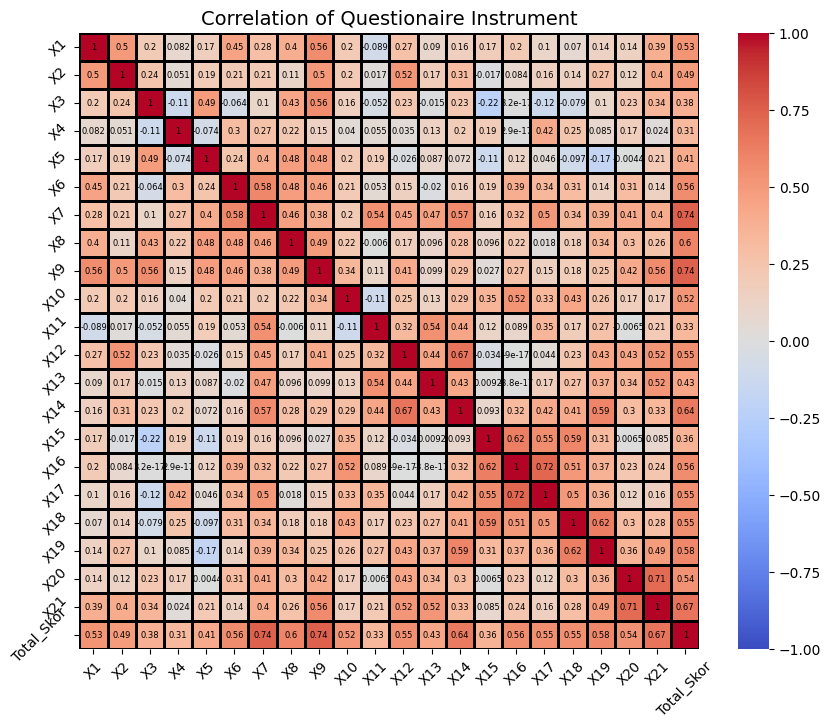

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

dfr = df.loc[0:29]
dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)

corr_matrix = dfr.corr()
# Membuat heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':6,'color':'black'})
# Menyesuaikan ukuran label dan merotasi mereka
plt.tick_params(labelsize=10, rotation=45)

# Menambahkan judul
plt.title('Correlation of Questionaire Instrument', size=14)

# Menyimpan gambar
plt.savefig("corr_quest.png")

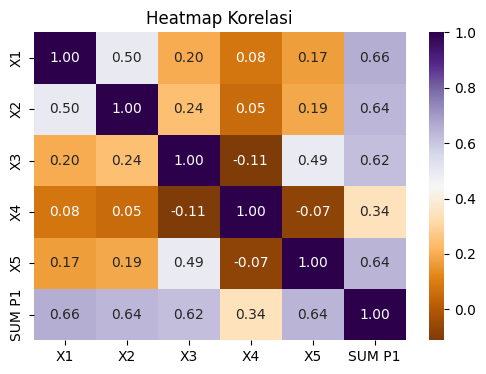

In [7]:
data = pd.read_csv('data_studi.csv')
df1 = data.loc[0:29,"X1":"SUM P1"]
corr_matrix = df1.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

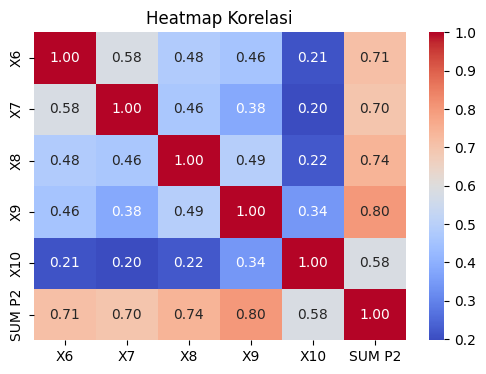

In [8]:
df2 = data.loc[0:29,"X6":"SUM P2"]
corr_matrix = df2.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

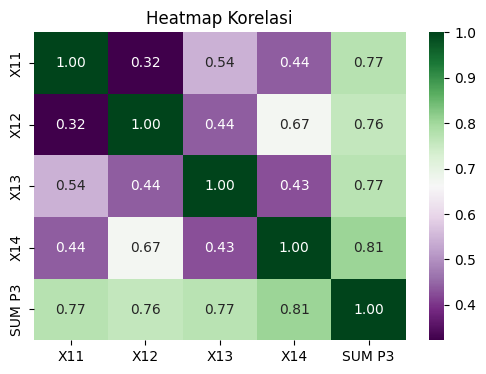

In [9]:
df3 = data.loc[0:29,"X11":"SUM P3"]
corr_matrix = df3.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PRGn', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

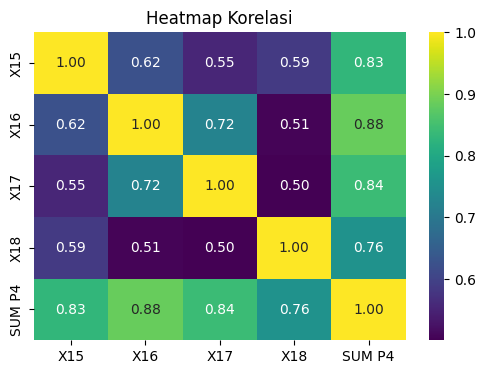

In [10]:
df4 = data.loc[0:29,"X15":"SUM P4"]
corr_matrix = df4.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

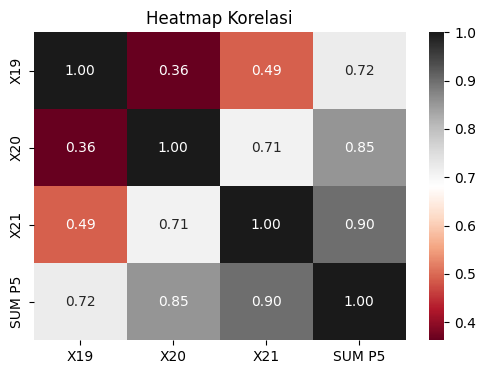

In [11]:
df5 = data.loc[0:29,"X19":"SUM P5"]
corr_matrix = df5.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='RdGy', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

C:\Users\rizky\AppData\Local\Temp\ipykernel_16908\2062869174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)


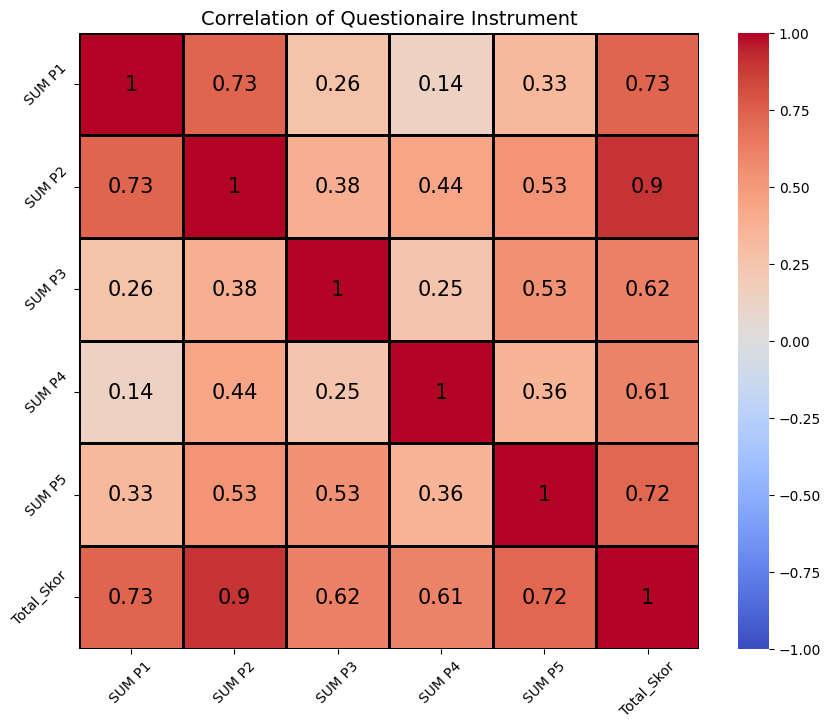

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new = data.loc[0:29]
# Memilih kolom-kolom dengan 'SUM P1' hingga 'SUM P5'
dfr = df_new[['SUM P1', 'SUM P2', 'SUM P3', 'SUM P4', 'SUM P5']]

dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)
dfr
corr_matrix = dfr.corr()
# Membuat heatmap
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':15,'color':'black'})
# Menyesuaikan ukuran label dan merotasi mereka
plt.tick_params(labelsize=10, rotation=45)

# Menambahkan judul
plt.title('Correlation of Questionaire Instrument', size=14)

# Menyimpan gambar
plt.savefig("corr_quest.png")

### Karena Mayoritas Indikator nilai R Hitung > R Tabel maka Data ini Valid

# **UJI RELIABILITAS**

In [13]:
dfr = df.loc[0:29]
dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)
dfr.head()

C:\Users\rizky\AppData\Local\Temp\ipykernel_16908\3471237405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,Total_Skor
0,3,3,2,2,2,3,2,2,2,3,...,3,3,3,3,3,3,3,2,3,56
1,3,3,3,3,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,69
2,3,3,2,3,4,4,4,3,2,2,...,3,3,2,2,3,3,2,2,2,58
3,3,3,3,3,4,4,4,4,4,2,...,3,3,3,3,3,3,3,4,4,69
4,4,4,2,2,2,4,4,3,4,2,...,3,4,2,3,3,3,4,4,4,68


In [14]:
import numpy as np

def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    
    for i, col in enumerate(df_corr.columns):
        sum = df_corr[col][i+1:].values 
        rs = np.append(sum, rs)
    mean_r= np.mean(rs)
    
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [15]:
cronbach_alpha(df)

0.8597796579903998

## Karena Nilai Cronach's Alpha > 0.70 Maka dapat disimpulkan Data ini Reliabel

# ANALISIS FAKTOR 

## a.) UJI KECUKUPAN

In [16]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(856.4217940511592, 6.766763400139569e-79)

In [18]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model


c:\Users\rizky\AppData\Local\Programs\Python\Python311\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7749047209515436

## b.) Analisis faktor 

In [19]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)

# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.74144857, 2.00698805, 1.71878509, 1.19616659, 1.12375242,
       1.06312233, 1.00192814, 0.95524295, 0.79144365, 0.76597461,
       0.66119661, 0.62060834, 0.56835086, 0.49182265, 0.46120113,
       0.43353821, 0.3901012 , 0.30867309, 0.26730492, 0.25046449,
       0.1818861 ])

## c.) Scree Plot

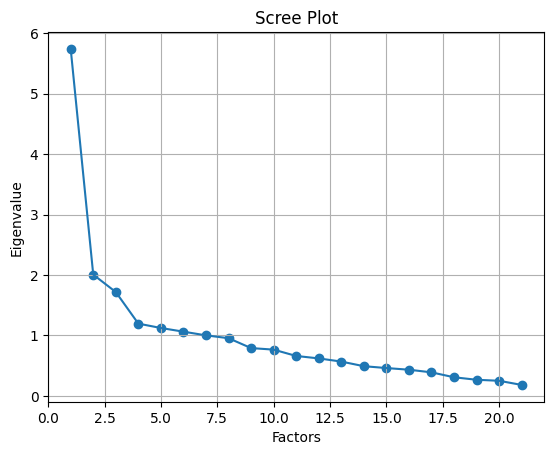

In [20]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## d.) Ambil faktor yang mempunyai nilai eigen > 1

In [21]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [22]:
loadings = fa.loadings_

In [23]:
factor_df=pd.DataFrame(fa.loadings_,index=df.columns)
print(factor_df)

            0         1         2         3         4         5
X1   0.117496  0.140607 -0.010992 -0.064291  0.493791  0.129974
X2   0.116322  0.126096  0.036073  0.124671  0.683801 -0.001504
X3  -0.122885  0.261563  0.012245  0.086726  0.434178  0.060544
X4   0.150431  0.265351  0.108277  0.027020  0.094347 -0.072817
X5   0.011869  0.276709  0.082156  0.062988  0.157771  0.411630
X6   0.250675  0.574094  0.088222  0.170204  0.155879  0.232459
X7   0.277700  0.713061  0.148885  0.095063  0.108172  0.124865
X8   0.143100  0.525037  0.062672  0.091989  0.253599  0.142906
X9   0.188558  0.408631  0.031433  0.220554  0.262671 -0.060419
X10  0.084975  0.382167  0.156178  0.117195  0.100679  0.241269
X11  0.658835  0.245598 -0.046696  0.034554 -0.045954  0.229583
X12  0.835806  0.193863  0.012336  0.154577  0.150362 -0.074852
X13  0.497342  0.149367  0.127959  0.150242  0.136869  0.117695
X14  0.619990  0.150042  0.176997  0.137291 -0.000510  0.005708
X15  0.212389  0.052673  0.501265  0.173